## CAPSTONE_PROJECT: BATTLE OF NEIGHBORHOODS WEEK 1&2 

Audu Abednego Ufedo

## The City Of Lagos Nigeria

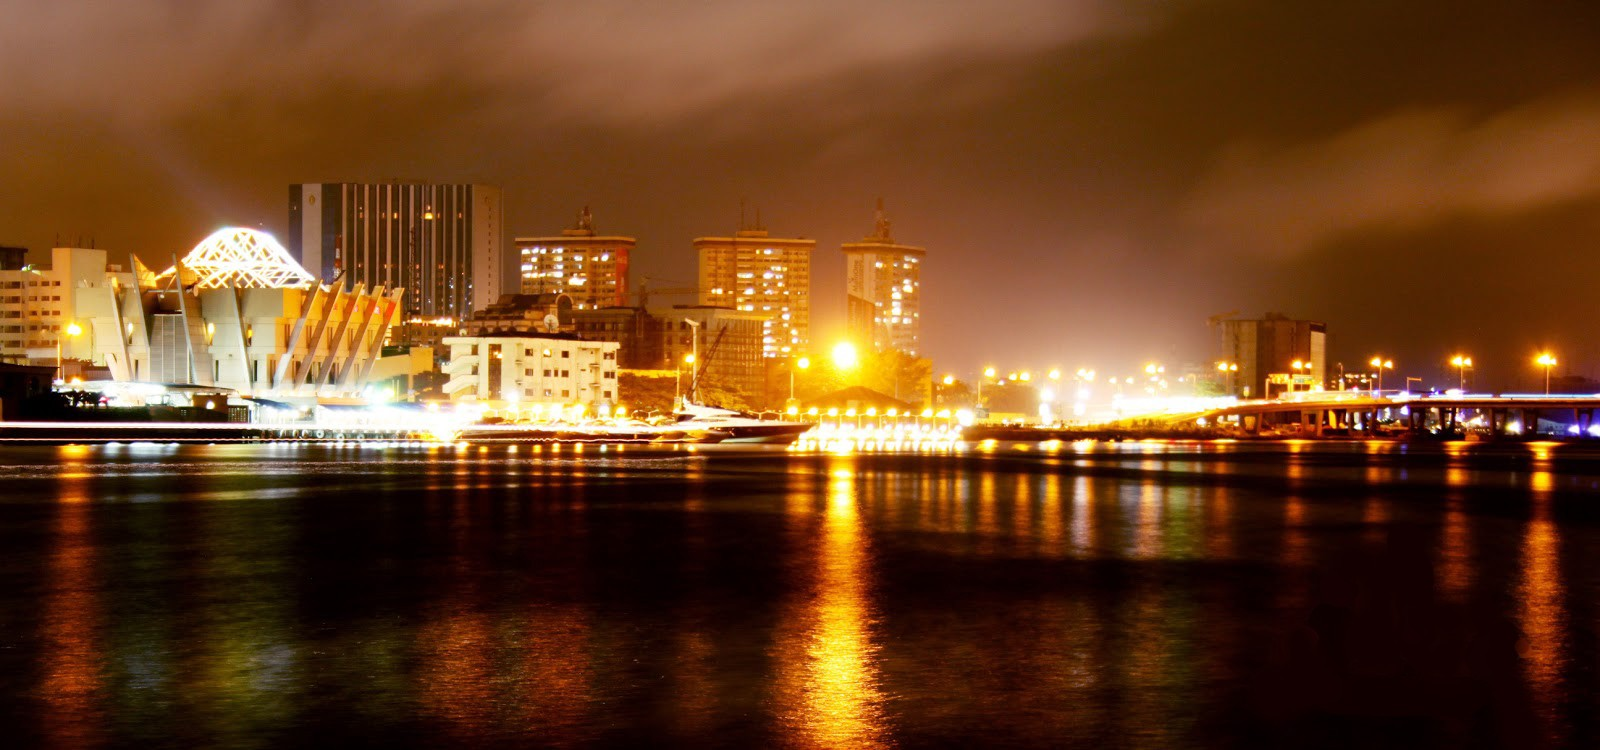

## Business Problem section

## Background

Actually, how do we go about deciding which Lagos neighbourhood is the least or most profitable? Home to over 17 million people, Lagos is on its way to becoming the seventh largest urban area in the world by 2020. This is right after recently obtaining the mega city status. In a society where owning property is regarded as a massive achievement, until you own a property you’re not viewed as one who has accomplished much. Real estate is quite the big deal around these parts.

Property prices in the nation’s former capital are constantly on the rise along with property owners incessantly increasing rent prices. With the massive expansion ongoing in Lagos, property in the suburbs could soon be at home in commercial neighbourhoods instead.

There’s an outcry over a housing problem in Lagos but the bane of this problem isn’t that there are no houses. Actually there are empty houses all over the city; with some staying vacant over a year without being rented out. This is quite the headache for someone looking to invest in Lagos real estate.
Some housing projects remain unoccupied because they are pricey in some neighbourhoods notably Lekki, VI, Ikoyi and Yaba. Nonetheless, developers/investors continue to put up more housing projects. To help navigate through the property market in Lagos, let’s identify which neighbourhoods offer more property investment value.
The ideal neighbourhood for investing in properties would have: Affordable rental price.







To solve this business problem, we are going to cluster lagos neighborhoods in order to recommend venues and the current average price of real estate where homebuyers can make a real estate investment. We will recommend profitable venues according to amenities and essential facilities surrounding such venues i.e. elementary schools, high schools, hospitals & stores.

## Data Collection Section

Data on Lagos properties and the relative price paid data were extracted from github (https://raw.githubusercontent.com/osinimu/tolet-housing-price-analysis/master/rent_2.csv).
To explore and target recommended locations across different venues according to the presence of amenities and essential facilities, we will access data through FourSquare API interface and arrange them as a dataframe for visualization. By merging data on Lagos properties and the relative price paid data from the HM Land Registry and data on amenities and essential facilities surrounding such properties from FourSquare API interface, we will be able to recommend profitable real estate investments.

 ## Methodology section

The Methodology section will describe the main components of our analysis and predication system. The Methodology section comprises four stages:

1. Data Collection 
2. Data Exploration
3. Data preparation and preprocessing 
4. Modeling

## Libraries needed for this Project

In [1]:
import os # Operating System
import numpy as np
import pandas as pd
import datetime as dt # Datetime
import json # library to handle JSON files


#!conda install -c conda-forge geopy --yes
#from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

#!conda install -c conda-forge folium=0.5.0 --yes
#import folium #import folium # map rendering library

print('Libraries imported.')

Libraries imported.


## 1. Data Collection

In [2]:
url = 'https://raw.githubusercontent.com/osinimu/tolet-housing-price-analysis/master/rent_2.csv'
response = requests.get(url)
df_rent = pd.read_csv(url,index_col=0)
df_rent.head()


,Price,Pid,Property_name,Address,Neighboorhood
0,400000,H1190,1 bedroom mini flat Flat / Apartment for rent ...,Fidiso Estate Abijo Ajah Lagos,Ajah
1,14000000,G7398,3 bedroom Flat / Apartment for rent Gerrard Ge...,Gerrard Gerrard Gerard Road Ikoyi Lagos,Ikoyi
2,200000,H5843,1 bedroom mini flat Flat / Apartment for rent ...,Obadia Akoka Yaba Lagos,Yaba
3,800000,H1194,2 bedroom Flat / Apartment for rent Iju Ishaga...,surulere Iju Ishaga Road Gbaja Surulere Lagos,Surulere
4,300000,H5842,1 bedroom mini flat Flat / Apartment for rent ...,Close to Unilag Abule Oja Yaba Lagos,Yaba


## 2. Data Exploration

In [3]:
df_rent.shape

(9853, 5)

In [4]:
df2_rent= df_rent.drop(['Pid', 'Address', ], axis =1)
df2_rent.head(20)

,Price,Property_name,Neighboorhood
0,400000,1 bedroom mini flat Flat / Apartment for rent ...,Ajah
1,14000000,3 bedroom Flat / Apartment for rent Gerrard Ge...,Ikoyi
2,200000,1 bedroom mini flat Flat / Apartment for rent ...,Yaba
3,800000,2 bedroom Flat / Apartment for rent Iju Ishaga...,Surulere
4,300000,1 bedroom mini flat Flat / Apartment for rent ...,Yaba
5,300000,1 bedroom mini flat Flat / Apartment for rent ...,Yaba
6,300000,Self Contain for rent Akoka Abule-Oja Yaba Lagos,Yaba
7,600000,2 bedroom Flat / Apartment for rent Akoka Yaba...,Yaba
8,450000,1 bedroom mini flat Flat / Apartment for rent ...,Yaba
9,1000000,3 bedroom Flat / Apartment for rent Alapere Ko...,Alapere


In [5]:
df3_rent = df2_rent.groupby(['Price','Property_name'])['Neighboorhood'].apply(lambda x: ', '.join(x))
df3_rent = df2_rent.reset_index()
df3_rent.rename(columns = {'Neighboorhood':'Neighborhood'}, inplace = True)
df3_rent.head()

,index,Price,Property_name,Neighborhood
0,0,400000,1 bedroom mini flat Flat / Apartment for rent ...,Ajah
1,1,14000000,3 bedroom Flat / Apartment for rent Gerrard Ge...,Ikoyi
2,2,200000,1 bedroom mini flat Flat / Apartment for rent ...,Yaba
3,3,800000,2 bedroom Flat / Apartment for rent Iju Ishaga...,Surulere
4,4,300000,1 bedroom mini flat Flat / Apartment for rent ...,Yaba


In [6]:
df3_rent.shape

(9853, 4)

## 3. Data preparation and preprocessing

In [9]:
df4_rent = df3_rent.groupby(['Neighborhood'])['Price'].mean().reset_index()

# Give meaningful names to the columns
df4_rent.columns = ['Neighborhood', 'Avg_Price']
df4_rent.head()

,Neighborhood,Avg_Price
0,Abule-Egba,1.253571e+06
1,Agege,1.178214e+06
2,Ajah,1.041329e+06
3,Alapere,1.140235e+06
4,Alimosho,5.798707e+05


In [10]:
#Input your Budget's Upper Limit and Lower Limit - Find the locations df_grp_price which fits your budget
df_affordable = df4_rent.query("(Avg_Price >= 200000) & (Avg_Price <= 14000000)")
df_affordable

,Neighborhood,Avg_Price
0,Abule-Egba,1.253571e+06
1,Agege,1.178214e+06
2,Ajah,1.041329e+06
3,Alapere,1.140235e+06
4,Alimosho,5.798707e+05
5,Amuwo-Odofin,9.985496e+05
7,Badagry,1.377059e+06
8,Bariga,5.121818e+05
9,Ejigbo,1.325000e+06
10,Epe,1.200000e+07


In [11]:
for index, item in df_affordable.iterrows():
    print(f"index: {index}")
    print(f"item: {item}")
    print(f"item.Neighborhood only: {item.Neighborhood}")

index: 0
item: Neighborhood     Abule-Egba
Avg_Price       1.25357e+06
Name: 0, dtype: object
item.Neighborhood only: Abule-Egba
index: 1
item: Neighborhood          Agege
Avg_Price       1.17821e+06
Name: 1, dtype: object
item.Neighborhood only: Agege
index: 2
item: Neighborhood           Ajah
Avg_Price       1.04133e+06
Name: 2, dtype: object
item.Neighborhood only: Ajah
index: 3
item: Neighborhood        Alapere
Avg_Price       1.14024e+06
Name: 3, dtype: object
item.Neighborhood only: Alapere
index: 4
item: Neighborhood    Alimosho
Avg_Price         579871
Name: 4, dtype: object
item.Neighborhood only: Alimosho
index: 5
item: Neighborhood    Amuwo-Odofin
Avg_Price             998550
Name: 5, dtype: object
item.Neighborhood only: Amuwo-Odofin
index: 7
item: Neighborhood        Badagry
Avg_Price       1.37706e+06
Name: 7, dtype: object
item.Neighborhood only: Badagry
index: 8
item: Neighborhood    Bariga
Avg_Price       512182
Name: 8, dtype: object
item.Neighborhood only: Bariga
ind

Get the latitude and the longitude coordinates of each neighborhood



In [12]:
!conda install -c conda-forge geopy --yes
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    geopy-1.22.0               |     pyh9f0ad1d_0          63 KB  conda-forge
    openssl-1.1.1g             |       h516909a_0         2.1 MB  conda-forge
    ca-certificates-2020.4.5.2 |       hecda079_0         147 KB  conda-forge
    certifi-2020.4.5.2         |   py36h9f0ad1d_0         152 KB  conda-forge
    python_abi-3.6             |          1_cp36m           4 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         2.5 MB

The following NEW packages will be INSTALLED:

    geographiclib:   1.50-py_0           conda-forge
    geopy:          

In [13]:
geolocator = Nominatim()

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:1: DeprecationWarning: Using Nominatim with the default "geopy/1.22.0" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  if __name__ == '__main__':


In [14]:
df_affordable['city_coord'] = df_affordable['Neighborhood'].apply(geolocator.geocode).apply(lambda x: (x.latitude, x.longitude))

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [15]:
df_affordable

,Neighborhood,Avg_Price,city_coord
0,Abule-Egba,1.253571e+06,"(6.866667, 2.9)"
1,Agege,1.178214e+06,"(6.6252564, 3.311209267702652)"
2,Ajah,1.041329e+06,"(6.4694716, 3.5623861)"
3,Alapere,1.140235e+06,"(6.5882517, 3.3975407)"
4,Alimosho,5.798707e+05,"(6.58434295, 3.257631097232365)"
5,Amuwo-Odofin,9.985496e+05,"(6.4470234, 3.2662797116825857)"
7,Badagry,1.377059e+06,"(6.4387296, 2.9074857493191666)"
8,Bariga,5.121818e+05,"(11.0512859, 122.7804717)"
9,Ejigbo,1.325000e+06,"(7.8999894, 4.3167086)"
10,Epe,1.200000e+07,"(6.52474955, 4.057245795132342)"


In [16]:
df_affordable[['Latitude', 'Longitude']] = df_affordable['city_coord'].apply(pd.Series)

/opt/conda/envs/Python36/lib/python3.6/site-packages/pandas/core/frame.py:3391: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


In [17]:
df_affordable

,Neighborhood,Avg_Price,city_coord,Latitude,Longitude
0,Abule-Egba,1.253571e+06,"(6.866667, 2.9)",6.866667,2.900000
1,Agege,1.178214e+06,"(6.6252564, 3.311209267702652)",6.625256,3.311209
2,Ajah,1.041329e+06,"(6.4694716, 3.5623861)",6.469472,3.562386
3,Alapere,1.140235e+06,"(6.5882517, 3.3975407)",6.588252,3.397541
4,Alimosho,5.798707e+05,"(6.58434295, 3.257631097232365)",6.584343,3.257631
5,Amuwo-Odofin,9.985496e+05,"(6.4470234, 3.2662797116825857)",6.447023,3.266280
7,Badagry,1.377059e+06,"(6.4387296, 2.9074857493191666)",6.438730,2.907486
8,Bariga,5.121818e+05,"(11.0512859, 122.7804717)",11.051286,122.780472
9,Ejigbo,1.325000e+06,"(7.8999894, 4.3167086)",7.899989,4.316709
10,Epe,1.200000e+07,"(6.52474955, 4.057245795132342)",6.524750,4.057246


In [18]:
df_new = df_affordable.drop(columns=['city_coord'])

In [19]:
df_new

,Neighborhood,Avg_Price,Latitude,Longitude
0,Abule-Egba,1.253571e+06,6.866667,2.900000
1,Agege,1.178214e+06,6.625256,3.311209
2,Ajah,1.041329e+06,6.469472,3.562386
3,Alapere,1.140235e+06,6.588252,3.397541
4,Alimosho,5.798707e+05,6.584343,3.257631
5,Amuwo-Odofin,9.985496e+05,6.447023,3.266280
7,Badagry,1.377059e+06,6.438730,2.907486
8,Bariga,5.121818e+05,11.051286,122.780472
9,Ejigbo,1.325000e+06,7.899989,4.316709
10,Epe,1.200000e+07,6.524750,4.057246


In [20]:
address = 'Lagos, NG'

geolocator = Nominatim()
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Lagos City are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Lagos City are 6.4550575, 3.3941795.


/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:3: DeprecationWarning: Using Nominatim with the default "geopy/1.22.0" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  app.launch_new_instance()


In [22]:
!conda install -c conda-forge folium=0.5.0 --yes
import folium #import folium # map rendering library

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    altair-4.1.0               |             py_1         614 KB  conda-forge
    folium-0.5.0               |             py_0          45 KB  conda-forge
    vincent-0.4.4              |             py_1          28 KB  conda-forge
    branca-0.4.1               |             py_0          26 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         713 KB

The following NEW packages will be INSTALLED:

    altair:  4.1.0-py_1 conda-forge
    branca:  0.4.1-py_0 conda-forge
    folium:  0.5.0-py_0 conda-forge
    vincent: 0.4.4-py_1 conda-forge


altair-4.1.0         | 614 KB    | ##################################### | 1

In [ ]:
# create map of London using latitude and longitude values
map_lagos = folium.Map(location=[6.4550575, 3.3941795], zoom_start=11)

# add markers to map
for lat, lng, price, street in zip(df_new['Latitude'], df_new['Longitude'], df_new['Avg_Price'], df_new['Neighborhood']):
    label = '{}, {}'.format(street, price)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_lagos)  
    
map_lagos

In [47]:
#Define Foursquare Credentials and Version

CLIENT_ID = 'WKOOYLFYSQXWTW1FMMHNZFYUXTGQ401JXQ44W3MDVB30PHEJ' # Foursquare ID
CLIENT_SECRET = 'TKFY1NILCTGVP1A433HDOZBVLSAQIAEL3PGKKT4DP2LFTQ0L' # Foursquare Secret
VERSION = '20200608' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: WKOOYLFYSQXWTW1FMMHNZFYUXTGQ401JXQ44W3MDVB30PHEJ
CLIENT_SECRET:TKFY1NILCTGVP1A433HDOZBVLSAQIAEL3PGKKT4DP2LFTQ0L



We can now proceed to the Modeling phase. We will analyze neighborhoods to recommend real estates where home buyers can make a real estate investment. We will then recommend profitable venues according to amenities and essential facilities surrounding such venues i.e. elementary schools, schools, hospitals &  stores.

## 4. Modeling:

After exploring the dataset and gaining insights into it, we are ready to use the clustering methodology to analyze real estates. We will use the k-means clustering technique as it is fast and efficient in terms of computational cost, is highly flexible to account for mutations in real estate market in London and is accurate.

In [48]:
def getNearbyVenues(names, latitudes, longitudes, radius=500, LIMIT=100):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Street', 
                  'Street Latitude', 
                  'Street Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [58]:
# Run the above function on each location and create a new dataframe called location_venues and display it.
location_venues = getNearbyVenues(names=df_new['Neighborhood'],
                                   latitudes=df_new['Latitude'],
                                   longitudes=df_new['Longitude']
                                  )

Abule-Egba
Agege
Ajah
Alapere
Alimosho
Amuwo-Odofin
Badagry
Bariga
Ejigbo
Epe
Gbagada
Ibeju-Lekki
Idimu
Ifako-Ijaiye
Igando
Ikeja
Ikorodu
Ikosi
Ikoyi
Ilupeju
Ipaja
Isolo
Kosofe
Lagos-Island
Lekki
Maryland
Mushin
Obalende
Ogba
Ogudu
Ojo
Okota
Orile
Oshodi
Sangotedo
Shomolu
Surulere
VGC
VI
Yaba


In [59]:
location_venues

,Street,Street Latitude,Street Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Agege,6.625256,3.311209,Hope Spring Water Charity,6.623651,3.310393,Business Service
1,Agege,6.625256,3.311209,Agbotikuyo,6.625004,3.313046,Bus Station
2,Ajah,6.469472,3.562386,Ajah Market,6.468307,3.565298,Convenience Store
3,Ajah,6.469472,3.562386,le tres amigos,6.468567,3.565255,Baseball Stadium
4,Ajah,6.469472,3.562386,Eko Farmers Market,6.466341,3.561893,Farmers Market
5,Ajah,6.469472,3.562386,Lestal Pharmacy,6.471225,3.565515,Pharmacy
6,Ajah,6.469472,3.562386,Ilaje Bus stop,6.465631,3.561363,Bus Station
7,Alapere,6.588252,3.397541,Idyll Okunusi Couture,6.591669,3.396505,Adult Boutique
8,Alapere,6.588252,3.397541,Ajiboye street,6.586409,3.393842,Dog Run
9,Amuwo-Odofin,6.447023,3.266280,Golden Tulip Festac Lagos,6.449725,3.269596,Hotel


In [61]:
location_venues.groupby('Street').count()

,Street Latitude,Street Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Street,,,,,,
Agege,2,2,2,2,2,2
Ajah,5,5,5,5,5,5
Alapere,2,2,2,2,2,2
Amuwo-Odofin,3,3,3,3,3,3
Badagry,1,1,1,1,1,1
Gbagada,3,3,3,3,3,3
Idimu,1,1,1,1,1,1
Ifako-Ijaiye,1,1,1,1,1,1
Ikeja,6,6,6,6,6,6


In [62]:
# get the List of Unique Categories
print('There are {} uniques categories.'.format(len(location_venues['Venue Category'].unique())))

There are 42 uniques categories.


In [63]:
location_venues.shape

(64, 7)

In [64]:
# one hot encoding
venues_onehot = pd.get_dummies(location_venues[['Venue Category']], prefix="", prefix_sep="")

# add street column back to dataframe
venues_onehot['Street'] = location_venues['Street'] 

# move street column to the first column
fixed_columns = [venues_onehot.columns[-1]] + list(venues_onehot.columns[:-1])

#fixed_columns
venues_onehot = venues_onehot[fixed_columns]

venues_onehot.head()

,Street,ATM,Adult Boutique,African Restaurant,Athletics & Sports,BBQ Joint,Bakery,Bar,Baseball Stadium,Bed & Breakfast,...,Market,Music Venue,Nightclub,Pharmacy,Pizza Place,Restaurant,Shop & Service,Shopping Mall,Steakhouse,Wine Bar
0,Agege,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Agege,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Ajah,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Ajah,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,Ajah,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [65]:
lagos_grouped = venues_onehot.groupby('Street').mean().reset_index()
lagos_grouped

,Street,ATM,Adult Boutique,African Restaurant,Athletics & Sports,BBQ Joint,Bakery,Bar,Baseball Stadium,Bed & Breakfast,...,Market,Music Venue,Nightclub,Pharmacy,Pizza Place,Restaurant,Shop & Service,Shopping Mall,Steakhouse,Wine Bar
0,Agege,0.0,0.0,0.000000,0.00,0.000000,0.000000,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.00,0.00,0.000000,0.000000,0.0,0.000000
1,Ajah,0.0,0.0,0.000000,0.00,0.000000,0.000000,0.0,0.2,0.0,...,0.000000,0.000000,0.000000,0.2,0.00,0.00,0.000000,0.000000,0.0,0.000000
2,Alapere,0.0,0.5,0.000000,0.00,0.000000,0.000000,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.00,0.00,0.000000,0.000000,0.0,0.000000
3,Amuwo-Odofin,0.0,0.0,0.000000,0.00,0.000000,0.000000,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.00,0.00,0.000000,0.000000,0.0,0.000000
4,Badagry,0.0,0.0,0.000000,0.00,0.000000,0.000000,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.00,0.00,0.000000,0.000000,0.0,0.000000
5,Gbagada,0.0,0.0,0.000000,0.00,0.000000,0.333333,0.0,0.0,0.0,...,0.000000,0.333333,0.000000,0.0,0.00,0.00,0.000000,0.000000,0.0,0.000000
6,Idimu,0.0,0.0,0.000000,0.00,0.000000,0.000000,1.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.00,0.00,0.000000,0.000000,0.0,0.000000
7,Ifako-Ijaiye,0.0,0.0,0.000000,0.00,0.000000,0.000000,1.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.00,0.00,0.000000,0.000000,0.0,0.000000
8,Ikeja,0.0,0.0,0.166667,0.00,0.166667,0.000000,0.0,0.0,0.0,...,0.000000,0.000000,0.166667,0.0,0.00,0.00,0.000000,0.000000,0.0,0.000000
9,Ikorodu,0.0,0.0,0.000000,0.00,0.000000,0.000000,0.2,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.00,0.00,0.000000,0.000000,0.0,0.000000


In [66]:
lagos_grouped.shape

(21, 43)

In [67]:
# What are the top 5 venues/facilities nearby profitable real estate investments?#

num_top_venues = 5

for hood in lagos_grouped['Street']:
    print("----"+hood+"----")
    temp = lagos_grouped[lagos_grouped['Street'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Agege----
              venue  freq
0       Bus Station   0.5
1  Business Service   0.5
2    Farmers Market   0.0
3   Harbor / Marina   0.0
4     Historic Site   0.0


----Ajah----
               venue  freq
0        Bus Station   0.2
1   Baseball Stadium   0.2
2  Convenience Store   0.2
3           Pharmacy   0.2
4     Farmers Market   0.2


----Alapere----
             venue  freq
0   Adult Boutique   0.5
1          Dog Run   0.5
2   Farmers Market   0.0
3           Garden   0.0
4  Harbor / Marina   0.0


----Amuwo-Odofin----
              venue  freq
0             Hotel  0.67
1  Department Store  0.33
2               ATM  0.00
3            Lounge  0.00
4   Harbor / Marina  0.00


----Badagry----
             venue  freq
0            Hotel   1.0
1              ATM   0.0
2           Lounge   0.0
3           Garden   0.0
4  Harbor / Marina   0.0


----Gbagada----
             venue  freq
0      Music Venue  0.33
1           Bakery  0.33
2           Lounge  0.33
3           Market  

In [68]:
# Define a function to return the most common venues/facilities nearby real estate investments#

def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [69]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Street']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

In [70]:
# create a new dataframe
venues_sorted = pd.DataFrame(columns=columns)
venues_sorted['Street'] = lagos_grouped['Street']

for ind in np.arange(lagos_grouped.shape[0]):
    venues_sorted.iloc[ind, 1:] = return_most_common_venues(lagos_grouped.iloc[ind, :], num_top_venues)

In [71]:
venues_sorted

,Street,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Agege,Business Service,Bus Station,Wine Bar,Boutique,Department Store,Country Dance Club,Convenience Store,Coffee Shop,Clothing Store,Café
1,Ajah,Farmers Market,Convenience Store,Pharmacy,Baseball Stadium,Bus Station,Wine Bar,Boutique,Country Dance Club,Coffee Shop,Clothing Store
2,Alapere,Dog Run,Adult Boutique,Boutique,Department Store,Country Dance Club,Convenience Store,Coffee Shop,Clothing Store,Café,Business Service
3,Amuwo-Odofin,Hotel,Department Store,Boutique,Country Dance Club,Convenience Store,Coffee Shop,Clothing Store,Café,Business Service,Bus Station
4,Badagry,Hotel,Wine Bar,Boutique,Country Dance Club,Convenience Store,Coffee Shop,Clothing Store,Café,Business Service,Bus Station
5,Gbagada,Bakery,Music Venue,Lounge,Wine Bar,Boutique,Country Dance Club,Convenience Store,Coffee Shop,Clothing Store,Café
6,Idimu,Bar,Wine Bar,Boutique,Department Store,Country Dance Club,Convenience Store,Coffee Shop,Clothing Store,Café,Business Service
7,Ifako-Ijaiye,Bar,Wine Bar,Boutique,Department Store,Country Dance Club,Convenience Store,Coffee Shop,Clothing Store,Café,Business Service
8,Ikeja,Boutique,African Restaurant,BBQ Joint,Nightclub,Lounge,History Museum,Wine Bar,Convenience Store,Coffee Shop,Clothing Store
9,Ikorodu,Bus Station,Electronics Store,Historic Site,Bar,Clothing Store,Wine Bar,Country Dance Club,Convenience Store,Coffee Shop,Café


In [72]:
venues_sorted.shape

(21, 11)

In [151]:
df2_new = venues_sorted
df2_new.head()

,Street,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Labels
0,Agege,Business Service,Bus Station,Wine Bar,Boutique,Department Store,Country Dance Club,Convenience Store,Coffee Shop,Clothing Store,Café,0
1,Ajah,Farmers Market,Convenience Store,Pharmacy,Baseball Stadium,Bus Station,Wine Bar,Boutique,Country Dance Club,Coffee Shop,Clothing Store,0
2,Alapere,Dog Run,Adult Boutique,Boutique,Department Store,Country Dance Club,Convenience Store,Coffee Shop,Clothing Store,Café,Business Service,0
3,Amuwo-Odofin,Hotel,Department Store,Boutique,Country Dance Club,Convenience Store,Coffee Shop,Clothing Store,Café,Business Service,Bus Station,1
4,Badagry,Hotel,Wine Bar,Boutique,Country Dance Club,Convenience Store,Coffee Shop,Clothing Store,Café,Business Service,Bus Station,1


After our inspection of venues/facilities/amenities nearby the most profitable real estate investments in Lagos, we could begin by clustering properties by venues/facilities/amenities nearby.

In [129]:
# import k-means from clustering stage
from sklearn.cluster import KMeans

In [150]:
#Dataframe to include Clusters
# number of clusters k = 3
df2_new["Labels"] = labels
df2_new.head(5)

,Street,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Labels
0,Agege,Business Service,Bus Station,Wine Bar,Boutique,Department Store,Country Dance Club,Convenience Store,Coffee Shop,Clothing Store,Café,0
1,Ajah,Farmers Market,Convenience Store,Pharmacy,Baseball Stadium,Bus Station,Wine Bar,Boutique,Country Dance Club,Coffee Shop,Clothing Store,0
2,Alapere,Dog Run,Adult Boutique,Boutique,Department Store,Country Dance Club,Convenience Store,Coffee Shop,Clothing Store,Café,Business Service,0
3,Amuwo-Odofin,Hotel,Department Store,Boutique,Country Dance Club,Convenience Store,Coffee Shop,Clothing Store,Café,Business Service,Bus Station,1
4,Badagry,Hotel,Wine Bar,Boutique,Country Dance Club,Convenience Store,Coffee Shop,Clothing Store,Café,Business Service,Bus Station,1


## Cluster 1

In [154]:

df2_new.loc[df2_new['Labels'] == 0, df2_new.columns[[1] + list(range(5, df2_new.shape[1]))]].head()

,1st Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Labels
0,Business Service,Department Store,Country Dance Club,Convenience Store,Coffee Shop,Clothing Store,Café,0
1,Farmers Market,Bus Station,Wine Bar,Boutique,Country Dance Club,Coffee Shop,Clothing Store,0
2,Dog Run,Country Dance Club,Convenience Store,Coffee Shop,Clothing Store,Café,Business Service,0
5,Bakery,Boutique,Country Dance Club,Convenience Store,Coffee Shop,Clothing Store,Café,0
8,Boutique,Lounge,History Museum,Wine Bar,Convenience Store,Coffee Shop,Clothing Store,0


## Cluster 2

In [156]:
df2_new.loc[df2_new['Labels'] == 1, df2_new.columns[[1] + list(range(5, df2_new.shape[1]))]].head()

,1st Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Labels
3,Hotel,Convenience Store,Coffee Shop,Clothing Store,Café,Business Service,Bus Station,1
4,Hotel,Convenience Store,Coffee Shop,Clothing Store,Café,Business Service,Bus Station,1
10,Hotel,Athletics & Sports,Country Dance Club,Convenience Store,Coffee Shop,Clothing Store,Café,1
16,Hotel,Country Dance Club,Convenience Store,Coffee Shop,Clothing Store,Café,Business Service,1


## Cluster 3

In [157]:
df2_new.loc[df2_new['Labels'] == 2, df2_new.columns[[1] + list(range(5, df2_new.shape[1]))]].head()

,1st Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Labels
6,Bar,Country Dance Club,Convenience Store,Coffee Shop,Clothing Store,Café,Business Service,2
7,Bar,Country Dance Club,Convenience Store,Coffee Shop,Clothing Store,Café,Business Service,2
18,Bar,Country Dance Club,Convenience Store,Coffee Shop,Clothing Store,Café,Business Service,2


In [ ]:
#map_clusters
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip( df2_new['Latitude'], df2_new['Longitude'], df2_new['Street'], df2_new ['Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

## Results and Discussion section

First, we may examine them according to neighborhoods/Lagos areas. It is interesting to note that,  some parts of lagos  (Agege, Ajah, Alapere) and (badagry, Gbagada, idimu) might be considered highly profitable venues to purchase a real estate according to amenities and essential facilities surrounding such venues i.e.Business service, Bus station, wine bar, and boutiques .Accordingly, one might target under-priced real estates in these areas of lagos in order to make a business affair.

Second, we may analyze our results according to the three clusters we have produced. Even though, all clusters could praise an optimal range of facilities and amenities, we have found two main patterns. The first pattern we are referring to, i.e. Clusters 0, may target home renters prone to live in 'green' areas with farmers market, business service. Instead, the second pattern we are referring to, i.e. Clusters 1 and 2, may target individuals who love country dance club, coffee shop and athletics & sports .

## Conclusion

 The Methodology section comprised four stages: 1. Collect Inspection Data; 2. Explore and Understand Data; 3. Data preparation and preprocessing; 4. Modeling. In particular, in the modeling section, we used the k-means clustering technique as it is fast and efficient in terms of computational cost, is highly flexible to account for mutations in real estate market in London and is accurate.
Finally, we drew the conclusion that even though the Lagos Housing Market may be in a rut, it is still an "ever-green" for business affairs.